In [1]:
'''
CLASS: Pandas for Data Exploration, Analysis, and Visualization

WHO alcohol consumption data:
    article: http://fivethirtyeight.com/datalab/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/    
    original data: https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption
    files: drinks.csv (with additional 'continent' column)
'''

"\nCLASS: Pandas for Data Exploration, Analysis, and Visualization\n\nWHO alcohol consumption data:\n    article: http://fivethirtyeight.com/datalab/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/    \n    original data: https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption\n    files: drinks.csv (with additional 'continent' column)\n"

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
'''
Pandas Basics: Reading Files, Summarizing, Handling Missing Values, Filtering, Sorting
'''

# read in the CSV file from a URL
drinks = pd.read_csv('../data/drinks.csv')

type(drinks)            # Use the type method to check python type


pandas.core.frame.DataFrame

In [4]:
# examine the data
drinks                  # print the first 30 and last 30 rows

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [5]:
drinks.head(2)           # print the first 5 rows

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [6]:
drinks.tail()           # print the last 5 rows

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [7]:
drinks.describe()       # describe any numeric columns

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [8]:
drinks.columns          # get series of column names

Index([u'country', u'beer_servings', u'spirit_servings', u'wine_servings',
       u'total_litres_of_pure_alcohol', u'continent'],
      dtype='object')

In [9]:
# Note: the dataframe is almost like a more complicated dictionary where the 
# column names are the keys and the column itself is the value

d = {'a':[1,2], 'b':[3,4]}
pd.DataFrame(d)

,a,b
0,1,3
1,2,4


In [10]:
drinks.shape            # tuple of (#rows, #cols)

(193, 6)

In [11]:
# find missing values in a DataFrame
drinks.isnull()         # DataFrame of booleans
drinks.isnull().sum()   # convert booleans to integers and add

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [12]:
# So we have 23 missing continent values, that's a no bueno situation

''' SELECT * from drinks where continent is NULL '''
drinks[drinks['continent'].isnull()]         # DataFrame of values with null continent value

# Anyone have any thoughts?


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [13]:
# Pandas isn't brilliant, it saw the "NA" string and assumed it meant a null value

# handling missing values
drinks.dropna()             # drop a row if ANY values are missing
drinks.fillna(value='NA')   # fill in missing values

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [14]:
# fix the original import
drinks = pd.read_csv('../data/drinks.csv', na_filter=False)
drinks.isnull().sum()



country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [15]:
# selecting a column ('Series')
drinks['continent']
drinks.continent            # equivalent

# Note the dictionary like selection

0      AS
1      EU
2      AF
3      EU
4      AF
5      NA
6      SA
7      EU
8      OC
9      EU
10     EU
11     NA
12     AS
13     AS
14     NA
15     EU
16     EU
17     NA
18     AF
19     AS
20     SA
21     EU
22     AF
23     SA
24     AS
25     EU
26     AF
27     AF
28     AF
29     AF
       ..
163    SA
164    AF
165    EU
166    EU
167    AS
168    AS
169    AS
170    EU
171    AS
172    AF
173    OC
174    NA
175    AF
176    AS
177    AS
178    OC
179    AF
180    EU
181    AS
182    EU
183    AF
184    NA
185    SA
186    AS
187    OC
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, dtype: object

In [16]:
type(drinks.continent)      # Series if pandas equivalent to list

pandas.core.series.Series

In [17]:
# summarizing a non-numeric column
drinks.continent.describe()

count     193
unique      6
top        AF
freq       53
Name: continent, dtype: object

In [18]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [19]:

'''
note the double square bracket
the outer pair is used like in a python dictionary
    to select
the inner pair is a list!

so in all, the double use of square brackets is telling
the dataframe to select a list!
'''
# selecting multiple columns
''' SELECT country,beer_servings from drinks '''
drinks[['country', 'beer_servings']]


,country,beer_servings
0,Afghanistan,0
1,Albania,89
2,Algeria,25
3,Andorra,245
4,Angola,217
5,Antigua & Barbuda,102
6,Argentina,193
7,Armenia,21
8,Australia,261
9,Austria,279


In [20]:
my_cols = ['country', 'beer_servings']
drinks[my_cols]

,country,beer_servings
0,Afghanistan,0
1,Albania,89
2,Algeria,25
3,Andorra,245
4,Angola,217
5,Antigua & Barbuda,102
6,Argentina,193
7,Armenia,21
8,Australia,261
9,Austria,279


In [21]:
# add a new column as a function of existing columns
drinks['total_servings'] = drinks.beer_servings +   drinks.spirit_servings + drinks.wine_servings
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [22]:
# logical filtering and sorting

'''
How it works:
    drinks.continent=='EU' by itself returns a bunch
        of Trues and Falses
        
drinks.continent=='EU'

See?


when you wrap drinks around it with square brackets
you're telling the drinks dataframe to select
only those that are True, and not the False ones

drinks[drinks.continent=='EU']
'''
drinks.continent=='EU' # is a series of T and F

drinks[drinks.continent=='EU'] 


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
1,Albania,89,132,54,4.9,EU,275
3,Andorra,245,138,312,12.4,EU,695
7,Armenia,21,179,11,3.8,EU,211
9,Austria,279,75,191,9.7,EU,545
10,Azerbaijan,21,46,5,1.3,EU,72
15,Belarus,142,373,42,14.4,EU,557
16,Belgium,295,84,212,10.5,EU,591
21,Bosnia-Herzegovina,76,173,8,4.6,EU,257
25,Bulgaria,231,252,94,10.3,EU,577
42,Croatia,230,87,254,10.2,EU,571


In [23]:
# North American countries with total servings
# drinks[['country', 'total_servings']][drinks.continent=='NA']

new_df = drinks[['country', 'total_servings']] # selection of two columns
new_df[drinks.continent=='NA']

,country,total_servings
5,Antigua & Barbuda,275
11,Bahamas,349
14,Barbados,352
17,Belize,385
32,Canada,462
41,Costa Rica,247
43,Cuba,235
50,Dominica,364
51,Dominican Republic,349
54,El Salvador,123


In [24]:
# same thing, sorted by total_servings
drinks[['country', 'total_servings']][drinks.continent=='NA'].sort_index(by='total_servings')

/Users/randalgoomer/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,country,total_servings
54,El Salvador,123
69,Guatemala,124
74,Honduras,169
84,Jamaica,188
122,Nicaragua,197
43,Cuba,235
41,Costa Rica,247
5,Antigua & Barbuda,275
109,Mexico,311
73,Haiti,328


In [25]:
#sorted in reverse order
drinks[['country', 'total_servings']][drinks.continent=='NA'].sort_index(by='total_servings', ascending = False)

/Users/randalgoomer/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,country,total_servings
68,Grenada,665
144,St. Lucia,557
184,USA,491
32,Canada,462
143,St. Kitts & Nevis,431
130,Panama,407
17,Belize,385
50,Dominica,364
174,Trinidad & Tobago,360
14,Barbados,352


In [26]:
# contries with wine servings over 300 and total liters over 12
drinks[drinks.wine_servings > 300][drinks.total_litres_of_pure_alcohol > 12]

/Users/randalgoomer/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
3,Andorra,245,138,312,12.4,EU,695


In [27]:
# contries with more wine servings than beer servings
drinks[drinks.wine_servings > drinks.beer_servings]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
3,Andorra,245,138,312,12.4,EU,695
6,Argentina,193,25,221,8.3,SA,439
35,Chile,130,124,172,7.6,SA,426
40,Cook Islands,0,254,74,5.9,OC,328
42,Croatia,230,87,254,10.2,EU,571
48,Denmark,224,81,278,10.4,EU,583
55,Equatorial Guinea,92,0,233,5.8,AF,325
61,France,127,151,370,11.8,EU,648
64,Georgia,52,100,149,5.4,EU,301
67,Greece,133,112,218,8.3,EU,463


In [28]:
# to reiterate how the filter works:
drinks.wine_servings > drinks.beer_servings # is a series of T and F

0      False
1      False
2      False
3       True
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
163    False
164    False
165     True
166     True
167     True
168    False
169    False
170    False
171     True
172    False
173    False
174    False
175    False
176    False
177     True
178     True
179    False
180    False
181    False
182    False
183    False
184    False
185     True
186    False
187    False
188    False
189    False
190    False
191    False
192    False
dtype: bool

In [29]:
# last 5 elements of the dataframe sorted by beer servings
drinks.sort_index(by='beer_servings').tail(6)

/Users/randalgoomer/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
98,Lithuania,343,244,56,12.9,EU,643
135,Poland,343,215,56,10.9,EU,614
65,Germany,346,117,175,11.3,EU,638
62,Gabon,347,98,59,8.9,AF,504
45,Czech Republic,361,170,134,11.8,EU,665
117,Namibia,376,3,1,6.8,AF,380


In [30]:
# Quiz

# 1. List countries that drink more spirits than beer on average
# 2. What are the top three beer drinking countries?
# 2. What are the top three beer drinking countries in Europe?

In [31]:
# 1.  drinks['country'][drinks.spirit_servings>drinks.beer_servings]
# 2. drinks[['country', 'beer_servings']].sort_index(by='wine_servings').tail(3)
drinks[drinks.continent=='EU'][['country', 'beer_servings']].sort_index(by='beer_servings', ascending=False).head(3)

/Users/randalgoomer/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,country,beer_servings
45,Czech Republic,361
65,Germany,346
135,Poland,343


In [32]:
# average North American beer consumption
'''
Note the procedure:
drinks                                          Dataframe
drinks.beer_servings                            one column (Series)
drinks.beer_servings[drinks.continent=='NA']    logical filtering
drinks.beer_servings[drinks.continent=='NA'].mean() mean of that filtered column
'''

print drinks.beer_servings[drinks.continent=='NA'].mean()




145.434782609


In [33]:
# average European beer consumption
drinks.beer_servings[drinks.continent=='EU'].mean()

193.77777777777777

**Split Apply Combine**

<img src="https://www.safaribooksonline.com/library/view/learning-pandas/9781783985128/graphics/5128OS_09_01.jpg">

Pandas uses the "groupby" command to split apply and combine

In [34]:
# for each continent, calculate mean beer servings
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [35]:
# for each continent, count number of occurrences
drinks.groupby('continent').continent.count()
drinks.continent.value_counts() #same thing

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [36]:
# We can apply any function using .apply
drinks.groupby('continent').total_servings.apply(lambda x: x.mean())    # mean

continent
AF     94.075472
AS    106.954545
EU    468.555556
NA    335.695652
OC    183.750000
SA    352.250000
Name: total_servings, dtype: float64

In [37]:
# on lambda functions:

'''
Lamda Functions are ananonymous functions

f = lambda x: x + 1   IS THE SAME AS 
def f(x): return x + 1
'''

'\nLamda Functions are ananonymous functions\n\nf = lambda x: x + 1   IS THE SAME AS \ndef f(x): return x + 1\n'

In [38]:
# note x here is an entire series
drinks.groupby('continent').total_servings.apply(lambda x: x.std())     # standard deviation

continent
AF    114.040622
AS    132.630446
EU    176.921857
NA    134.437696
OC    175.450848
SA     81.923606
Name: total_servings, dtype: float64

In [39]:
# for each continent, calculate the min, max, and range for total servings
print drinks.groupby('continent').total_servings.min()
print drinks.groupby('continent').total_servings.max()

continent
AF      0
AS      0
EU      0
NA    123
OC      0
SA    216
Name: total_servings, dtype: int64
continent
AF    504
AS    646
EU    695
NA    665
OC    545
SA    439
Name: total_servings, dtype: int64


In [40]:
# What does this do?
drinks.groupby('continent').total_servings.apply(lambda x: x.max() - x.min())

continent
AF    504
AS    646
EU    695
NA    542
OC    545
SA    223
Name: total_servings, dtype: int64

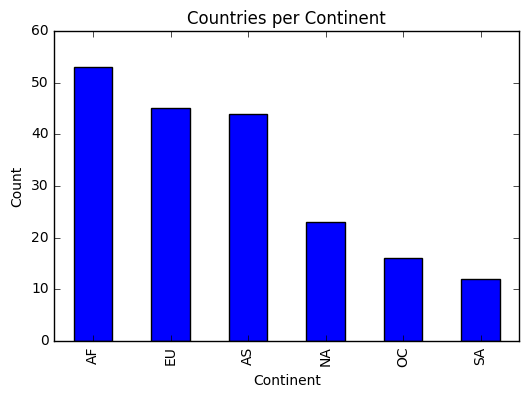

In [41]:
'''
Plotting
'''

# bar plot of number of countries in each continent
drinks.continent.value_counts().plot(kind='bar', title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')

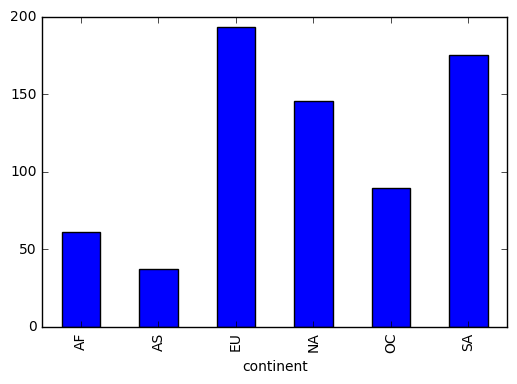

In [42]:
# bar plot of average number of beer servings by continent
drinks.groupby('continent').beer_servings.mean().plot(kind='bar')

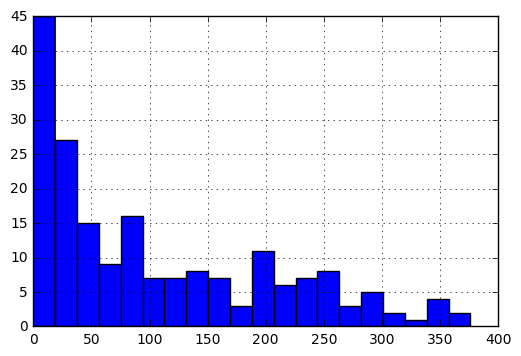

In [43]:
# histogram of beer servings
drinks.beer_servings.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115e338d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115ec21d0>]], dtype=object)

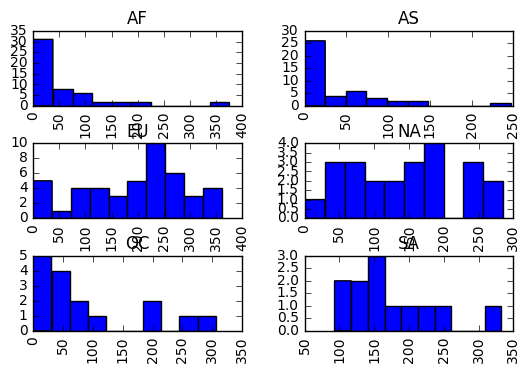

In [44]:
# grouped histogram of beer servings
drinks.beer_servings.hist(by=drinks.continent)

# stop and think, does this make sense


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11671bd10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116a7b6d0>]], dtype=object)

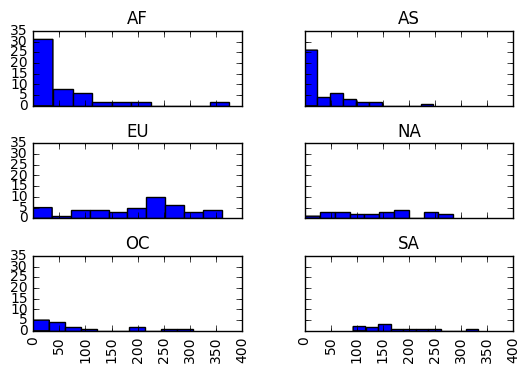

In [45]:
# same charts with the same scale for x and y axis
drinks.beer_servings.hist(by=drinks.continent, sharex=True, sharey=True)

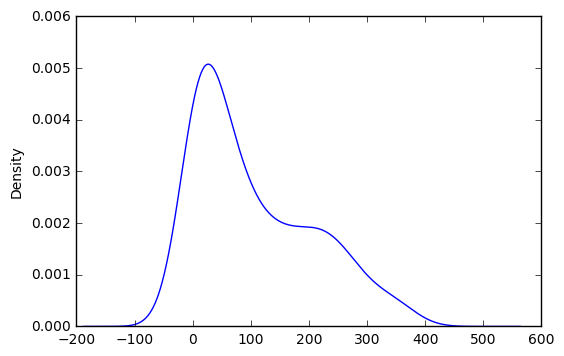

In [46]:
# density plot of beer servings
drinks.beer_servings.plot(kind='density')

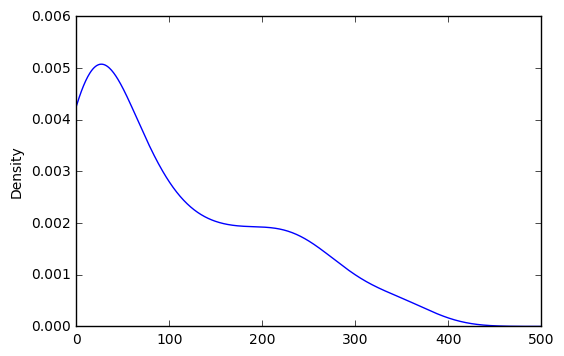

In [47]:
# same chart, with new x limit
drinks.beer_servings.plot(kind='density', xlim=(0,500))

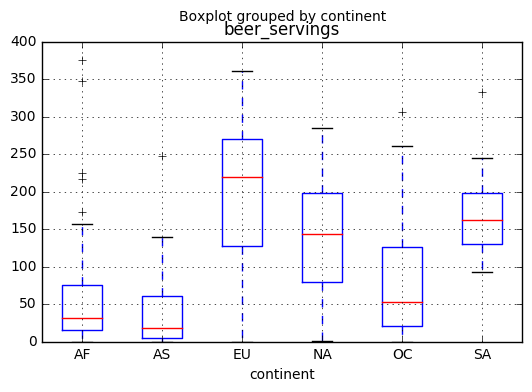

In [48]:
# boxplot of beer servings by continent
drinks.boxplot(column='beer_servings', by='continent')

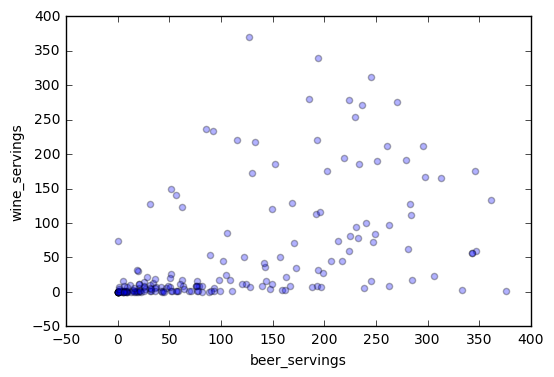

In [49]:
# scatterplot of beer servings versus wine servings
drinks.plot(x='beer_servings', y='wine_servings', kind='scatter', alpha=0.3)

In [50]:
# same scatterplot, except all European countries are colored red
colors = np.where(drinks.continent=='EU', 'r', 'b')
colors      # is a series of 'r' and 'b' that 
            # correspond to countries



array(['b', 'r', 'b', 'r', 'b', 'b', 'b', 'r', 'b', 'r', 'r', 'b', 'b',
       'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'r', 'b', 'r', 'r', 'b', 'b', 'r', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'r',
       'r', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b',
       'b', 'b', 'b', 'r', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'r', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b',
       'b', 'r', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'r', 'b', 'b', 'b',
       'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b',
       'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r',
       'r', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b',
       'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r

In [51]:
'''
np.where is like a condensed if statement
it's like a list comprehension for pandas!

it will loop through drinks.continent which is a series
for each element:
    if it is "EU":
        make it 'r'
    else:
        make it 'b'

More in depth:
    drinks.continent=='EU' is a logical statement
        It will return a bunch of Trues and Falses
        and np.where makes the True ones 'r' and
        the False ones 'b'
        
        Recall logical filtering!

'''

# Side quest
np.where([True, False, False], 'a', 'b')

# 10 gold coins earned




array(['a', 'b', 'b'], 
      dtype='|S1')

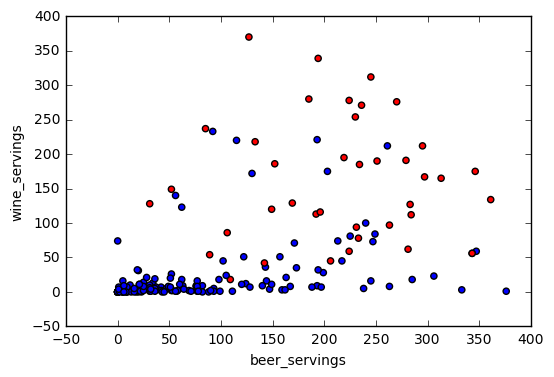

In [52]:
drinks.plot(x='beer_servings', y='wine_servings', kind='scatter', c=colors)
# passing colors into the chart makes the european dots, red!

In [53]:
'''
Joining Data

MovieLens 100k data:
    main page: http://grouplens.org/datasets/movielens/
    data dictionary: http://files.grouplens.org/datasets/movielens/ml-100k-README.txt
    files: u.user, u.data, u.item
'''

# read 'u.data' into 'ratings'
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_table('../data/u.data', header=None, names=r_cols, sep='\t')

# read 'u.item' into 'movies'
m_cols = ['movie_id', 'title']
movies = pd.read_table('../data/u.item', header=None, names=m_cols, sep='|', usecols=[0,1])

In [54]:
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [55]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [56]:
# merge 'movies' and 'ratings' (inner join on 'movie_id')
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,unix_timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [57]:
'''
Further Exploration
'''

# for each movie, count number of ratings
movie_ratings.title.value_counts()

Star Wars (1977)                                      583
Contact (1997)                                        509
Fargo (1996)                                          508
Return of the Jedi (1983)                             507
Liar Liar (1997)                                      485
English Patient, The (1996)                           481
Scream (1996)                                         478
Toy Story (1995)                                      452
Air Force One (1997)                                  431
Independence Day (ID4) (1996)                         429
Raiders of the Lost Ark (1981)                        420
Godfather, The (1972)                                 413
Pulp Fiction (1994)                                   394
Twelve Monkeys (1995)                                 392
Silence of the Lambs, The (1991)                      390
Jerry Maguire (1996)                                  384
Chasing Amy (1997)                                    379
Rock, The (199

In [58]:
# Quiz

# for each movie, calculate the mean rating
# scroll down for answer



In [59]:
movie_ratings.groupby('title').rating.mean().order(ascending=False)

/Users/randalgoomer/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [60]:
'''
----UFO data----
Scraped from: http://www.nuforc.org/webreports.html
'''

'\n----UFO data----\nScraped from: http://www.nuforc.org/webreports.html\n'

In [61]:
ufo = pd.read_csv('../data/ufo.csv')   


In [62]:
ufo.head()              # Look at the top 5 observations

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [63]:
ufo.tail()              # Look at the bottom 5 observations


,City,Colors Reported,Shape Reported,State,Time
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43
80542,Loughman,NaN,LIGHT,FL,9/5/2014 5:30


In [64]:
ufo['Location'] = ufo['City'] + ', ' + ufo['State']

In [65]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [66]:
# rename some columns
ufo.rename(columns={'Colors Reported':'Colors', 'Shape Reported':'Shape'}, inplace=True)

In [67]:
ufo.head()

,City,Colors,Shape,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [68]:
del ufo['City']                  # delete a column (permanently)
del ufo['State']                 # delete a column (permanently)

In [69]:
ufo.Shape.value_counts()                # excludes missing values

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
HEXAGON          1
FLARE            1
PYRAMID          1
DOME             1
Name: Shape, dtype: int64

In [70]:
ufo.Shape.value_counts(dropna=False)    # includes missing values

LIGHT        16332
NaN           8402
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
HEXAGON          1
PYRAMID          1
DOME             1
FLARE            1
Name: Shape, dtype: int64

In [71]:
ufo.Shape.isnull().sum() # count the missing values in the shape column

8402

In [72]:
ufo.isnull().sum()       # returns a count of missing values in all columns

Colors      63509
Shape        8402
Time            0
Location       47
dtype: int64

In [73]:
# Shows how many rows has a not null shape AND a not null color
ufo[(ufo.Shape.notnull()) & (ufo.Colors.notnull())]

,Colors,Shape,Time,Location
12,RED,SPHERE,6/30/1939 20:00,"Belton, SC"
19,RED,OTHER,4/30/1943 23:00,"Bering Sea, AK"
36,RED,FORMATION,7/10/1945 1:30,"Portsmouth, VA"
44,GREEN,SPHERE,6/30/1946 19:00,"Blairsden, CA"
82,BLUE,CHEVRON,7/15/1947 21:00,"San Jose, CA"
84,BLUE,DISK,8/8/1947 22:00,"Modesto, CA"
91,RED,SPHERE,5/10/1948 19:00,"Scipio, IN"
111,ORANGE,CIRCLE,8/15/1949 22:00,"Tarrant City, AL"
129,GREEN,DISK,6/10/1950 0:00,"Napa, CA"
138,ORANGE,CIGAR,7/2/1950 13:00,"Coeur d'Alene, ID"


In [74]:
ufo.dropna()             # drop a row if ANY values are missing
print ufo.dropna().shape
ufo.dropna(how='all')    # drop a row only if ALL values are missing
print ufo.dropna(how='all').shape

(15510, 4)
(80543, 4)


In [75]:
ufo.head()                      # Without an inplace=True, the dataframe is unaffected!

,Colors,Shape,Time,Location
0,NaN,TRIANGLE,6/1/1930 22:00,"Ithaca, NY"
1,NaN,OTHER,6/30/1930 20:00,"Willingboro, NJ"
2,NaN,OVAL,2/15/1931 14:00,"Holyoke, CO"
3,NaN,DISK,6/1/1931 13:00,"Abilene, KS"
4,NaN,LIGHT,4/18/1933 19:00,"New York Worlds Fair, NY"


In [76]:
ufo.Colors.fillna(value='Unknown', inplace=True)

In [77]:
ufo.fillna(value = 'Unknown')   # Temporary

,Colors,Shape,Time,Location
0,Unknown,TRIANGLE,6/1/1930 22:00,"Ithaca, NY"
1,Unknown,OTHER,6/30/1930 20:00,"Willingboro, NJ"
2,Unknown,OVAL,2/15/1931 14:00,"Holyoke, CO"
3,Unknown,DISK,6/1/1931 13:00,"Abilene, KS"
4,Unknown,LIGHT,4/18/1933 19:00,"New York Worlds Fair, NY"
5,Unknown,DISK,9/15/1934 15:30,"Valley City, ND"
6,Unknown,CIRCLE,6/15/1935 0:00,"Crater Lake, CA"
7,Unknown,DISK,7/15/1936 0:00,"Alma, MI"
8,Unknown,CIGAR,10/15/1936 17:00,"Eklutna, AK"
9,Unknown,CYLINDER,6/15/1937 0:00,"Hubbard, OR"


In [78]:
ufo.head()

,Colors,Shape,Time,Location
0,Unknown,TRIANGLE,6/1/1930 22:00,"Ithaca, NY"
1,Unknown,OTHER,6/30/1930 20:00,"Willingboro, NJ"
2,Unknown,OVAL,2/15/1931 14:00,"Holyoke, CO"
3,Unknown,DISK,6/1/1931 13:00,"Abilene, KS"
4,Unknown,LIGHT,4/18/1933 19:00,"New York Worlds Fair, NY"


In [79]:
ufo.fillna(value = 'Unknown', inplace = True)   # Permanent

In [80]:
''' Fun Stuff '''

# Make a new month column
ufo['Month'] = ufo['Time'].apply(lambda x:int(x.split('/')[0]))

'''
the apply function applys the lambda funciton to every element in the Series
lambda x:x.split('/')[0] will take in x and split it by '/' and return the first element
so if we pass in say 9/3/2014 01:22 into the function we would get:
9                i.e. the month
'''

# similar for day
ufo['Day'] = ufo['Time'].apply(lambda x:int(x.split('/')[1]))

# for year, I need the [:4] at the end to remove the time
ufo['Year'] = ufo['Time'].apply(lambda x:int(x.split('/')[2][:4]))
ufo.head()

,Colors,Shape,Time,Location,Month,Day,Year
0,Unknown,TRIANGLE,6/1/1930 22:00,"Ithaca, NY",6,1,1930
1,Unknown,OTHER,6/30/1930 20:00,"Willingboro, NJ",6,30,1930
2,Unknown,OVAL,2/15/1931 14:00,"Holyoke, CO",2,15,1931
3,Unknown,DISK,6/1/1931 13:00,"Abilene, KS",6,1,1931
4,Unknown,LIGHT,4/18/1933 19:00,"New York Worlds Fair, NY",4,18,1933


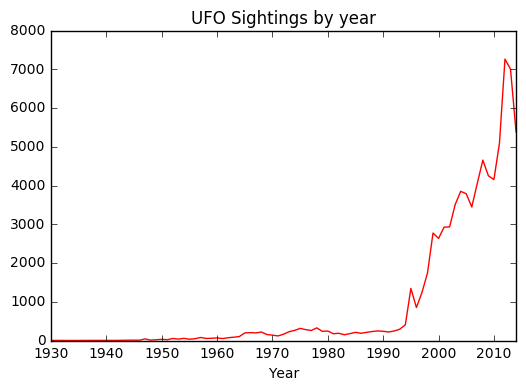

In [83]:

sightings_per_year = ufo.groupby('Year').Location.count()

sightings_per_year.plot(kind='line', 
                        color='r', 
                        linewidth=1, 
                        title='UFO Sightings by year')


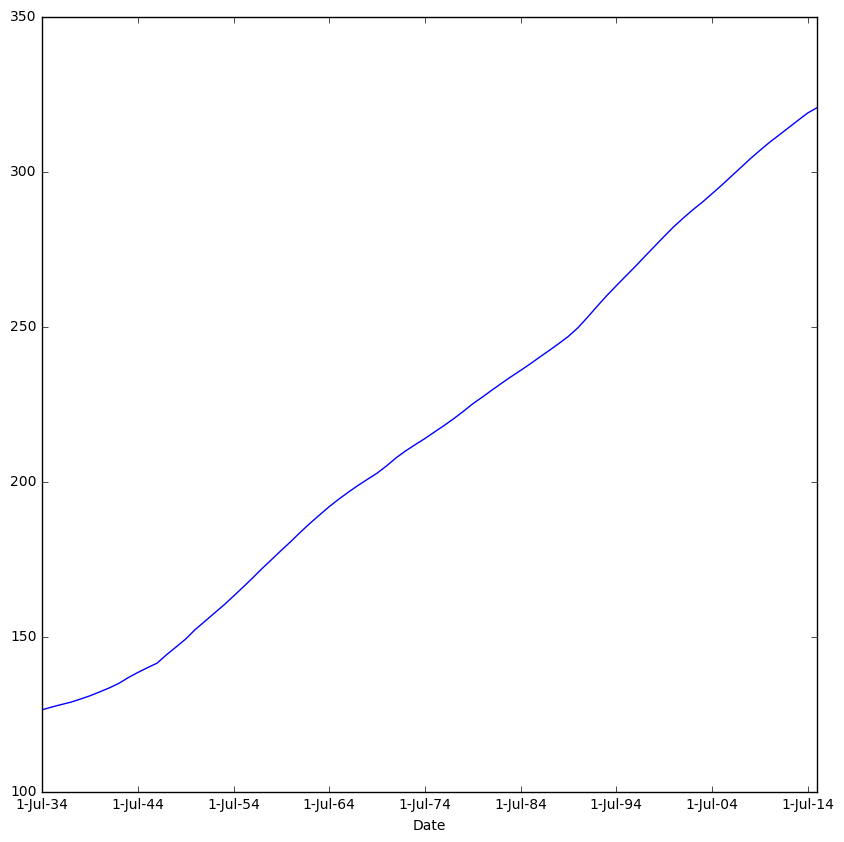

In [85]:
# -----Analysis-----
# Clearly, Aliens love the X-Files (which came out in 1993).
# Aliens are a natural extension of the target demographic so it makes sense.

# Well hold on Sinan, the US population is always increasing
# So maybe there's a jump in population which would make sense!
# US Population data from 1930 as taken from the Census

us_population = pd.read_csv('../data/us_population.csv')
us_population.plot(x = 'Date', y = 'Population', legend = False, figsize = (10,10))
# Seems like a steady increase to me..


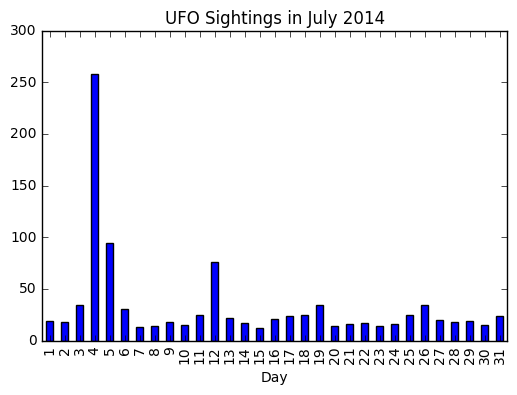

In [89]:
# Plot the sightings in in July 
ufo[(ufo.Year==2014) & (ufo.Month == 7)].groupby('Day').Location.count().plot(  kind='bar',
                                                        color='b', 
                                                        title='UFO Sightings in July 2014')
                                                        

# -----Analysis-----
# Aliens are love the 4th of July. The White House is still standing. Therefore
# it follows that Aliens are just here for the party.

# Well maybe it's just 2014?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11fc04110>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ff5e9d0>], dtype=object)

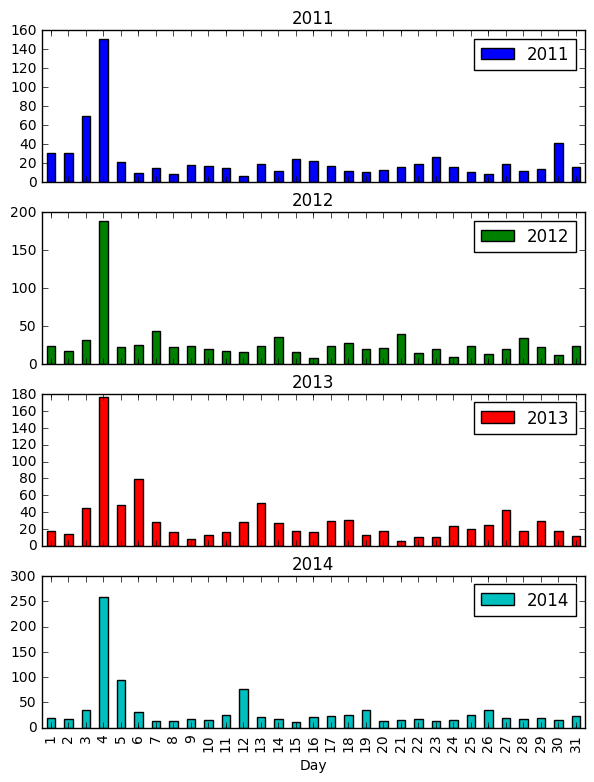

In [93]:
# Plot multiple plots on the same plot (plots neeed to be in column format)
ufo_fourth = ufo[(ufo.Year.isin([2011, 2012, 2013, 2014])) & (ufo.Month == 7)]


# unstack will take a groupby of multiple indices and split it by column (mainly great for sub plotting)

# Hmm let's make that prettier by making it 4 seperate charts
ufo_fourth.groupby(['Year', 'Day']).Location.count().unstack(0).plot(
                                        kind = 'bar',
                                        subplots=True, 
                                        figsize = (7,9))
